In [1]:
import pandas as pd
import numpy as np

In [2]:
# Salvando como CSV
df = pd.read_csv('analise_atendimento.csv')

In [3]:
df.head()

,ID_Atendimento,Data_Atendimento,Cliente_ID,Canal,Tempo_Resposta_Minutos,Resolvido,Satisfacao
0,1,2024-01-01,C001,E-mail,15,Sim,5
1,2,2024-01-02,C002,Telefone,30,Não,4
2,3,2024-01-03,C003,Chat Online,10,Sim,3
3,4,2024-01-04,C004,WhatsApp,45,Não,2
4,5,2024-01-05,C005,E-mail,25,Sim,1


## Eficiência do Atendimento

### Qual é o tempo médio de resposta por canal de atendimento?

In [4]:
# Calculando a média do tempo de resposta por canal
tempo_medio_por_canal = df.groupby("Canal")["Tempo_Resposta_Minutos"].mean().reset_index()

# Exibindo o resultado
print(tempo_medio_por_canal)

         Canal  Tempo_Resposta_Minutos
0  Chat Online               28.461538
1       E-mail               26.538462
2     Telefone               27.500000
3     WhatsApp               27.500000


### Qual é a média de tempo de resposta para atendimentos resolvidos vs. não resolvidos?

In [5]:
tempo_medio_resposta = df.groupby("Resolvido")["Tempo_Resposta_Minutos"].mean().reset_index()
tempo_medio_resposta

,Resolvido,Tempo_Resposta_Minutos
0,Não,28.166667
1,Sim,26.500000


### O tempo de resposta impacta a satisfação do cliente?

In [6]:
tempo_resposta_satisfacao = df.groupby("Tempo_Resposta_Minutos")["Satisfacao"]
tempo_resposta_satisfacao

In [7]:
# Calculando a correlação entre Tempo de Resposta e Satisfação
correlacao = df["Tempo_Resposta_Minutos"].corr(df["Satisfacao"])
print(f"Correlação entre Tempo de Resposta e Satisfação: {correlacao:.2f}")

Correlação entre Tempo de Resposta e Satisfação: -0.23


#### Como o valor está negativo, sugere que quando o tempo de resposta aumenta, a satisfação tende a diminuir.
#### Porém, como -0.30 não é um valor muito forte, isso indica que o tempo de resposta não é o único fator que influencia a satisfação.
#### Outros fatores podem estar impactando a nota de satisfação, como a qualidade da resposta, a complexidade do problema ou a experiência do atendente.

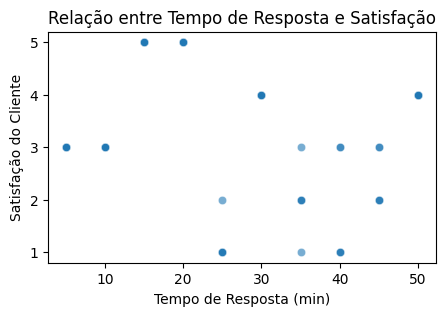

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.scatterplot(x=df["Tempo_Resposta_Minutos"], y=df["Satisfacao"], alpha=0.6)

plt.xlabel("Tempo de Resposta (min)")
plt.ylabel("Satisfação do Cliente")
plt.title("Relação entre Tempo de Resposta e Satisfação")

plt.show()

### Qual canal tem o maior tempo de resposta?

In [9]:
canal_resposta_mais_demora = df.groupby("Canal")["Tempo_Resposta_Minutos"].mean().reset_index()
canal_resposta_mais_demora = canal_resposta_mais_demora.sort_values(by="Tempo_Resposta_Minutos", ascending=False)
canal_resposta_mais_demora

,Canal,Tempo_Resposta_Minutos
0,Chat Online,28.461538
2,Telefone,27.500000
3,WhatsApp,27.500000
1,E-mail,26.538462


## Qualidade do Atendimento

### Qual é a taxa de resolução dos atendimentos?

In [10]:
taxa_resolucao = (df["Resolvido"].value_counts(normalize=True) * 100).reset_index()

print(taxa_resolucao)

  Resolvido  proportion
0       Não        60.0
1       Sim        40.0


### Qual canal tem a maior taxa de resolução?

In [11]:
# Calculando a taxa de resolução por canal
taxa_resolucao_canal = df.groupby("Canal")["Resolvido"].value_counts(normalize=True).unstack() * 100

# Selecionando apenas a taxa de atendimentos resolvidos
taxa_resolucao_canal = taxa_resolucao_canal["Sim"].reset_index()

# Ordenando do maior para o menor
taxa_resolucao_canal = taxa_resolucao_canal.sort_values(by="Sim", ascending=False)

# Exibindo o resultado
print(taxa_resolucao_canal)

         Canal        Sim
0  Chat Online  76.923077
1       E-mail  76.923077
2     Telefone        NaN
3     WhatsApp        NaN


### Existe uma relação entre o canal de atendimento e a satisfação do cliente?

In [12]:
from scipy.stats import chi2_contingency

In [13]:
satisfacao_por_canal = df.groupby('Canal')['Satisfacao'].mean().reset_index()

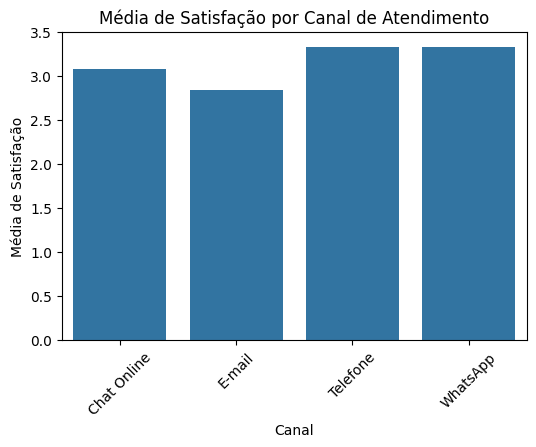

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(data=satisfacao_por_canal, x='Canal', y='Satisfacao')
plt.title('Média de Satisfação por Canal de Atendimento')
plt.ylabel('Média de Satisfação')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Para verificar se existe uma relação estatística significativa (como o teste de qui-quadrado)
# Primeiro, transformamos Satisfacao para uma variável categórica (exemplo: satisfatorio/insatisfatório)
df['Satisfacao_Categ'] = df['Satisfacao'].apply(lambda x: 'Satisfeito' if x >= 4 else 'Insatisfeito')

# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(df['Canal'], df['Satisfacao_Categ'])

# Realizar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

print(f"Valor-p do teste qui-quadrado: {p}")
if p < 0.05:
    print("Existe uma relação estatisticamente significativa entre o Canal e a Satisfação.")
else:
    print("Não há uma relação estatisticamente significativa entre o Canal e a Satisfação.")

Valor-p do teste qui-quadrado: 0.8618923709756185
Não há uma relação estatisticamente significativa entre o Canal e a Satisfação.


### Clientes que tiveram o problema resolvido avaliam melhor o atendimento?

In [16]:
satisfacao_por_resolvido = df.groupby("Resolvido")["Satisfacao"].mean().reset_index()

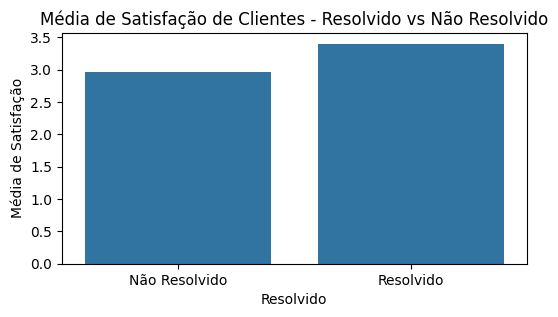

In [17]:
# Visualizar com um gráfico de barras
plt.figure(figsize=(6,3))
sns.barplot(data=satisfacao_por_resolvido, x='Resolvido', y='Satisfacao')
plt.title('Média de Satisfação de Clientes - Resolvido vs Não Resolvido')
plt.ylabel('Média de Satisfação')
plt.xticks([0, 1], ['Não Resolvido', 'Resolvido'])
plt.show()

## Análise de Satisfação do Cliente

### Há algum padrão de insatisfação em determinados períodos?

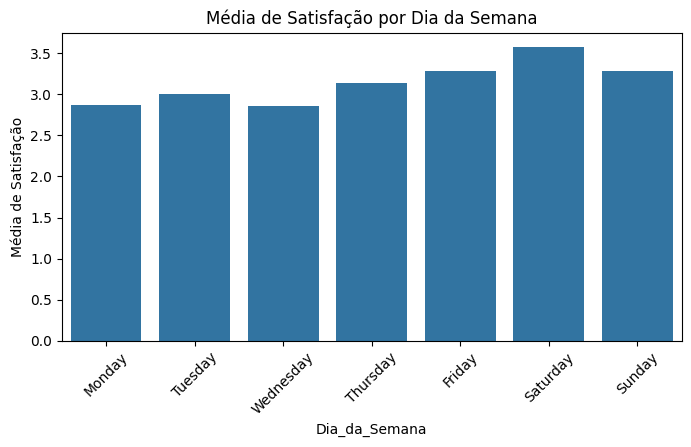

In [18]:
# Converter a coluna 'Data_Atendimento' para datetime, se necessário
df['Data_Atendimento'] = pd.to_datetime(df['Data_Atendimento'])

# Extrair o dia da semana e a hora de atendimento
df['Dia_da_Semana'] = df['Data_Atendimento'].dt.day_name()  # Nome do dia
df['Hora'] = df['Data_Atendimento'].dt.hour  # Hora do dia

# Agrupar por Dia da Semana e calcular a média de Satisfação
satisfacao_por_dia = df.groupby('Dia_da_Semana')['Satisfacao'].mean().reset_index()

# Visualizar a satisfação média por dia da semana
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(data=satisfacao_por_dia, x='Dia_da_Semana', y='Satisfacao', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Média de Satisfação por Dia da Semana')
plt.ylabel('Média de Satisfação')
plt.xticks(rotation=45)
plt.show()

### Qual é a média da satisfação dos clientes?

In [19]:
# Calcular a média da satisfação dos clientes
media_satisfacao = df['Satisfacao'].mean()

# Exibir a média
print(f'A média de satisfação dos clientes é: {media_satisfacao}')

A média de satisfação dos clientes é: 3.14


### A satisfação dos clientes está mais baixa em algum canal específico?

         Canal  Satisfacao
0  Chat Online    3.076923
1       E-mail    2.846154
2     Telefone    3.333333
3     WhatsApp    3.333333


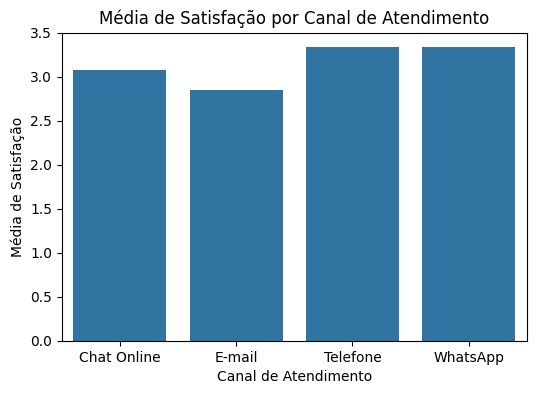

In [20]:
satisfacao_por_canal = df.groupby('Canal')['Satisfacao'].mean().reset_index()

# Exibir as médias de satisfação por canal
print(satisfacao_por_canal)

# Visualizar a média de satisfação por canal com um gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(data=satisfacao_por_canal, x='Canal', y='Satisfacao')
plt.title('Média de Satisfação por Canal de Atendimento')
plt.xlabel('Canal de Atendimento')
plt.ylabel('Média de Satisfação')
plt.show()

## Tendências e Padrões

### O número de atendimentos varia ao longo do tempo?

  Data_Atendimento  Numero_Atendimentos
0       2024-01-01                    1
1       2024-01-02                    1
2       2024-01-03                    1
3       2024-01-04                    1
4       2024-01-05                    1


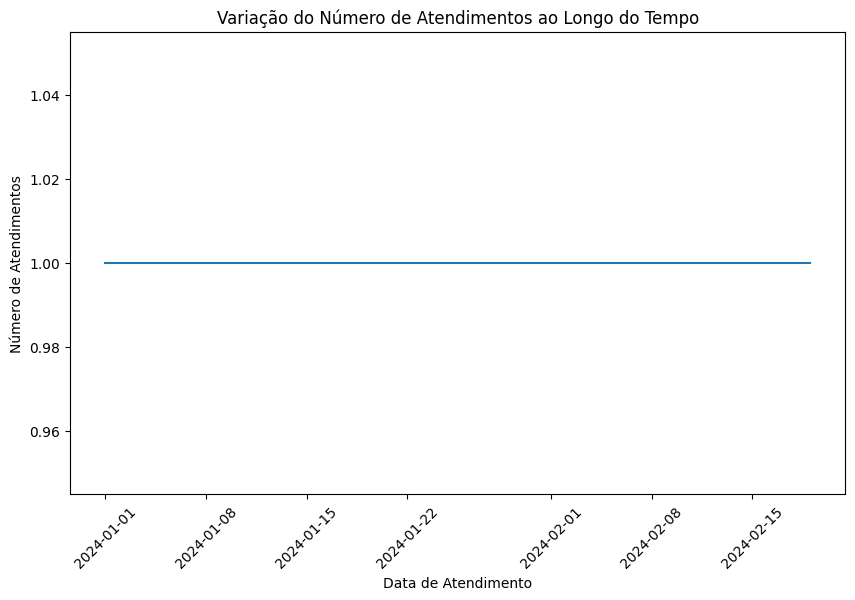

In [21]:
# Garantir que 'Data_Atendimento' está no formato datetime
df['Data_Atendimento'] = pd.to_datetime(df['Data_Atendimento'], errors='coerce')

# Agrupar por data e contar o número de atendimentos por dia
atendimentos_por_dia = df.groupby(df['Data_Atendimento'].dt.date).size().reset_index(name='Numero_Atendimentos')

# Exibir as primeiras linhas dos dados agrupados
print(atendimentos_por_dia.head())

# Visualizar a variação do número de atendimentos ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=atendimentos_por_dia, x='Data_Atendimento', y='Numero_Atendimentos')
plt.title('Variação do Número de Atendimentos ao Longo do Tempo')
plt.xlabel('Data de Atendimento')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45)
plt.show()

### Existe uma tendência de aumento ou redução no número de atendimentos resolvidos?

In [22]:
# Verificar os valores únicos na coluna 'Resolvido'
print(df['Resolvido'].unique())

['Sim' 'Não']


  Data_Atendimento  Atendimentos_Resolvidos
0       2024-01-01                        1
1       2024-01-03                        1
2       2024-01-05                        1
3       2024-01-07                        1
4       2024-01-09                        1
5       2024-01-11                        1
6       2024-01-13                        1
7       2024-01-15                        1
8       2024-01-17                        1
9       2024-01-21                        1


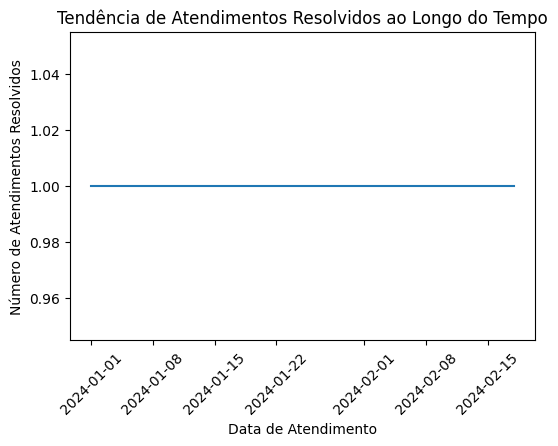

In [23]:
# Filtrar os atendimentos resolvidos (considerando que 'Resolvido' é 'SIM' para resolvido)
df_resolvido = df[df['Resolvido'] == 'Sim']

# Agrupar por data e contar os atendimentos resolvidos por dia
atendimentos_resolvidos_por_dia = df_resolvido.groupby(df_resolvido['Data_Atendimento'].dt.date).size().reset_index(name='Atendimentos_Resolvidos')

# Verificar os dados agrupados
print(atendimentos_resolvidos_por_dia.head(10))

# Visualizar a tendência de atendimentos resolvidos ao longo do tempo
plt.figure(figsize=(6,4))
sns.lineplot(data=atendimentos_resolvidos_por_dia, x='Data_Atendimento', y='Atendimentos_Resolvidos')
plt.title('Tendência de Atendimentos Resolvidos ao Longo do Tempo')
plt.xlabel('Data de Atendimento')
plt.ylabel('Número de Atendimentos Resolvidos')
plt.xticks(rotation=45)
plt.show()

## Comparações e Benchmarking

### Qual canal é mais eficiente em termos de resolução e tempo de resposta?

In [24]:
# Calcular a taxa de resolução por canal (proporção de 'SIM' na coluna 'Resolvido')
taxa_resolucao_por_canal = df.groupby('Canal')['Resolvido'].apply(lambda x: (x == 'Sim').mean()).reset_index(name='Taxa_Resolucao')

# Exibir as taxas de resolução por canal
print(taxa_resolucao_por_canal)

         Canal  Taxa_Resolucao
0  Chat Online        0.769231
1       E-mail        0.769231
2     Telefone        0.000000
3     WhatsApp        0.000000


In [25]:
# Calcular o tempo médio de resposta por canal
tempo_medio_resposta_por_canal = df.groupby('Canal')['Tempo_Resposta_Minutos'].mean().reset_index(name='Tempo_Medio_Resposta')

# Exibir o tempo médio de resposta por canal
print(tempo_medio_resposta_por_canal)

         Canal  Tempo_Medio_Resposta
0  Chat Online             28.461538
1       E-mail             26.538462
2     Telefone             27.500000
3     WhatsApp             27.500000


In [26]:
# Combinar as duas métricas
eficiencia_por_canal = pd.merge(taxa_resolucao_por_canal, tempo_medio_resposta_por_canal, on='Canal')

# Exibir o resultado
print(eficiencia_por_canal)

         Canal  Taxa_Resolucao  Tempo_Medio_Resposta
0  Chat Online        0.769231             28.461538
1       E-mail        0.769231             26.538462
2     Telefone        0.000000             27.500000
3     WhatsApp        0.000000             27.500000


### Clientes atendidos por WhatsApp ou Chat Online estão mais satisfeitos do que os atendidos por Telefone ou E-mail?

In [27]:
# Calcular a média de satisfação por canal
satisfacao_por_canal = df.groupby('Canal')['Satisfacao'].mean().reset_index(name='Media_Satisfacao')

# Exibir a média de satisfação por canal
print(satisfacao_por_canal)

         Canal  Media_Satisfacao
0  Chat Online          3.076923
1       E-mail          2.846154
2     Telefone          3.333333
3     WhatsApp          3.333333


In [28]:
# Separar os canais em dois grupos: WhatsApp/Chat Online e Telefone/E-mail
grupo_1 = satisfacao_por_canal[satisfacao_por_canal['Canal'].isin(['WhatsApp', 'Chat Online'])]
grupo_2 = satisfacao_por_canal[satisfacao_por_canal['Canal'].isin(['Telefone', 'E-mail'])]

# Comparar as médias de satisfação
media_satisfacao_grupo_1 = grupo_1['Media_Satisfacao'].mean()
media_satisfacao_grupo_2 = grupo_2['Media_Satisfacao'].mean()

# Exibir as médias
print(f'Média de satisfação (WhatsApp e Chat Online): {media_satisfacao_grupo_1}')
print(f'Média de satisfação (Telefone e E-mail): {media_satisfacao_grupo_2}')

Média de satisfação (WhatsApp e Chat Online): 3.2051282051282053
Média de satisfação (Telefone e E-mail): 3.08974358974359


### Os atendimentos mais demorados ocorrem em qual canal?

In [29]:
# Calcular o tempo médio de resposta por canal
tempo_medio_resposta_por_canal = df.groupby('Canal')['Tempo_Resposta_Minutos'].mean().reset_index(name='Tempo_Medio_Resposta')

# Identificar o canal com o maior tempo de resposta médio
canal_mais_demorado = tempo_medio_resposta_por_canal.loc[tempo_medio_resposta_por_canal['Tempo_Medio_Resposta'].idxmax()]

# Exibir o canal com o maior tempo de resposta
print(f'O canal com os atendimentos mais demorados é: {canal_mais_demorado["Canal"]} com um tempo médio de {canal_mais_demorado["Tempo_Medio_Resposta"]} minutos.')

O canal com os atendimentos mais demorados é: Chat Online com um tempo médio de 28.46153846153846 minutos.


## Análise de Problemas Não Resolvidos

### O percentual de atendimentos não resolvidos está alto?

In [30]:
# Calcular o percentual de atendimentos não resolvidos
percentual_nao_resolvido = (df['Resolvido'] == 'Não').mean() * 100

# Exibir o resultado
print(f'O percentual de atendimentos não resolvidos é: {percentual_nao_resolvido:.2f}%')

O percentual de atendimentos não resolvidos é: 60.00%


### Quais fatores influenciam o não atendimento de um problema?

In [31]:
# Calcular a taxa de resolução por canal (proporção de 'SIM' na coluna 'Resolvido')
taxa_resolucao_por_canal = df.groupby('Canal')['Resolvido'].apply(lambda x: (x == 'Sim').mean()).reset_index(name='Taxa_Resolucao')

# Exibir a taxa de resolução por canal
print(taxa_resolucao_por_canal)

         Canal  Taxa_Resolucao
0  Chat Online        0.769231
1       E-mail        0.769231
2     Telefone        0.000000
3     WhatsApp        0.000000


   Tempo_Resposta_Minutos  Taxa_Resolucao
0                       5             0.0
1                      10             1.0
2                      15             1.0
3                      20             0.0
4                      25             0.4
5                      30             0.0
6                      35             0.6
7                      40             0.0
8                      45             0.0
9                      50             1.0


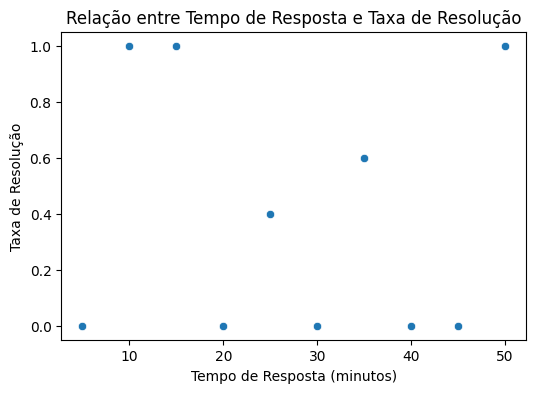

In [32]:
# Calcular a taxa de resolução em relação ao tempo de resposta
resolucao_vs_tempo = df.groupby('Tempo_Resposta_Minutos')['Resolvido'].apply(lambda x: (x == 'Sim').mean()).reset_index(name='Taxa_Resolucao')

# Exibir a relação entre tempo de resposta e taxa de resolução
print(resolucao_vs_tempo)

# Visualizar a relação com um gráfico
plt.figure(figsize=(6,4))
sns.scatterplot(data=resolucao_vs_tempo, x='Tempo_Resposta_Minutos', y='Taxa_Resolucao')
plt.title('Relação entre Tempo de Resposta e Taxa de Resolução')
plt.xlabel('Tempo de Resposta (minutos)')
plt.ylabel('Taxa de Resolução')
plt.show()

   Satisfacao  Taxa_Resolucao
0           1             0.0
1           2             0.0
2           3             0.0
3           4             0.0
4           5             0.0


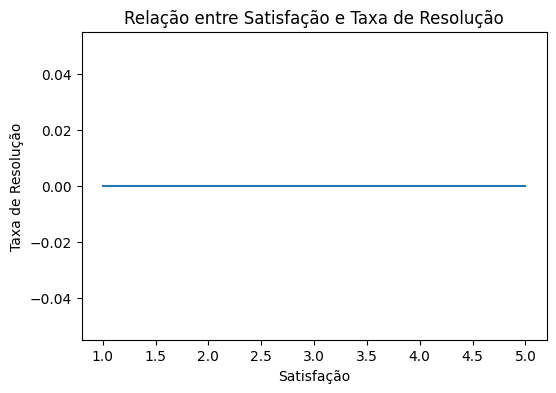

In [33]:
# Calcular a taxa de resolução em relação à satisfação
resolucao_vs_satisfacao = df.groupby('Satisfacao')['Resolvido'].apply(lambda x: (x == 'SIM').mean()).reset_index(name='Taxa_Resolucao')

# Exibir a relação entre satisfação e taxa de resolução
print(resolucao_vs_satisfacao)

# Visualizar a relação com um gráfico
plt.figure(figsize=(6,4))
sns.lineplot(data=resolucao_vs_satisfacao, x='Satisfacao', y='Taxa_Resolucao')
plt.title('Relação entre Satisfação e Taxa de Resolução')
plt.xlabel('Satisfação')
plt.ylabel('Taxa de Resolução')
plt.show()

In [34]:
## Considerações:

##### Por meio das análises, o tempo médio de atendimento de todos os canais está em aproximadamente 29 minutos e que quando o tempo de resposta
##### aumenta o nível de satisfação do cliente diminui. O Chat Online é o canal que mais demora no retorno ao cliente enquanto o e-mail é o mais rápido,
##### com um tempo médio de 26 minutos. Observou-se que o nível de insatisfação aumenta aos sábados e que a média de satisfação dos clientes é de 3.
##### O canal do Telefone foi o que obteve um nível desatisfação maior em comparação com outros canais. 
##### AO longo dos dias, a quantidade de atendimentos resolvidos é de 1 atendimento por dia.